In [87]:
import pandas as pd

# Define the file path to the Excel file
file_name = "files.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_name)
print(xls.sheet_names)

# Load data from each sheet directly into DataFrames
user_details = pd.read_excel(file_name, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_name, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_name, sheet_name='OrderDetails.csv')

# Check the data
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1     

In [88]:
# Check for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [89]:
# Check the data types of each column in the  dataframe
print(user_details.dtypes)
print(cooking_sessions.dtypes)
print(order_details.dtypes)

User ID                      object
User Name                    object
Age                           int64
Location                     object
Registration Date    datetime64[ns]
Phone                        object
Email                        object
Favorite Meal                object
Total Orders                  int64
dtype: object
Session ID                 object
User ID                    object
Dish Name                  object
Meal Type                  object
Session Start      datetime64[ns]
Session End        datetime64[ns]
Duration (mins)             int64
Session Rating            float64
dtype: object
Order ID                 int64
User ID                 object
Order Date      datetime64[ns]
Meal Type               object
Dish Name               object
Order Status            object
Amount (USD)           float64
Time of Day             object
Rating                 float64
Session ID              object
dtype: object


In [90]:
# Merge user details with order details
merged_data = pd.merge(order_details, user_details, on='User ID', how='inner')

# Merge cooking sessions with the merged data
final_data = pd.merge(merged_data, cooking_sessions, on='Session ID', how='inner')

# Rename columns to avoid conflicts
final_data.rename(columns={
    'User ID_x': 'User ID',
    'Dish Name_x': 'Order Dish Name',
    'Meal Type_x': 'Order Meal Type',
    'User ID_y': 'Session User ID',
    'Dish Name_y': 'Session Dish Name',
    'Meal Type_y': 'Session Meal Type'
}, inplace=True)

# Preview the final merged dataset
print(final_data.head())

   Order ID User ID Order Date Order Meal Type  Order Dish Name Order Status  \
0      1001    U001 2024-12-01          Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01           Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02          Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02       Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03           Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  ...              Email  \
0          15.0       Night     5.0       S001  ...    alice@email.com   
1          10.0         Day     4.0       S002  ...      bob@email.com   
2          12.5       Night     NaN       S003  ...  charlie@email.com   
3           8.0     Morning     4.0       S004  ...    alice@email.com   
4           9.0         Day     4.0       S005  ...    david@email.com   

   Favorite Meal Total Orders Session User ID Session Dish Name  \
0      

In [92]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           16 non-null     int64         
 1   User ID            16 non-null     object        
 2   Order Date         16 non-null     datetime64[ns]
 3   Order Meal Type    16 non-null     object        
 4   Order Dish Name    16 non-null     object        
 5   Order Status       16 non-null     object        
 6   Amount (USD)       16 non-null     float64       
 7   Time of Day        16 non-null     object        
 8   Rating             14 non-null     float64       
 9   Session ID         16 non-null     object        
 10  User Name          16 non-null     object        
 11  Age                16 non-null     int64         
 12  Location           16 non-null     object        
 13  Registration Date  16 non-null     datetime64[ns]
 14  Phone       

In [102]:
# Identify the most popular dishes
popular_dishes = final_data.groupby('Order Dish Name')['Order ID'].count().sort_values(ascending=False)
print("Top 5 Popular Dishes:")
print(popular_dishes.head())  # Display only the top 5 dishes for clarity

# Calculate the correlation between session duration and order amount
correlation = final_data[['Duration (mins)', 'Amount (USD)']].corr()
print("Correlation Between Session Duration and Order Amount:")
print(correlation)

# Brief Insights
print("\nInsights:")
print("- A strong positive correlation would mean longer cooking sessions lead to higher order amounts.")
print("- A strong negative correlation would mean the opposite, shorter sessions might result in higher spending.")
print("- Correlation close to zero indicates no significant relationship.")


Top 5 Popular Dishes:
Order Dish Name
Grilled Chicken    4
Spaghetti          4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: Order ID, dtype: int64
Correlation Between Session Duration and Order Amount:
                 Duration (mins)  Amount (USD)
Duration (mins)         1.000000      0.645002
Amount (USD)            0.645002      1.000000

Insights:
- A strong positive correlation would mean longer cooking sessions lead to higher order amounts.
- A strong negative correlation would mean the opposite, shorter sessions might result in higher spending.
- Correlation close to zero indicates no significant relationship.


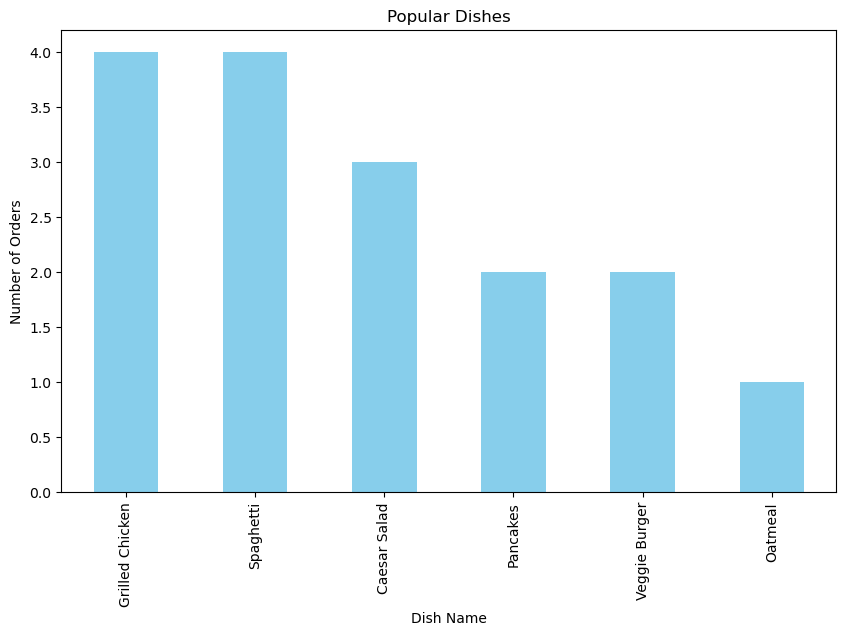

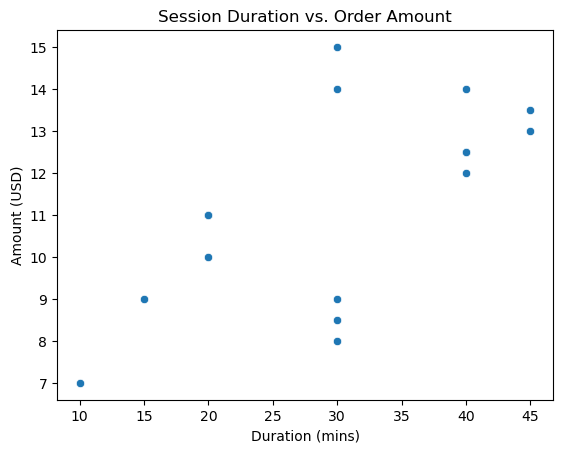

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for popular dishes
popular_dishes.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.show()

# Scatter plot for session duration vs. order amount
sns.scatterplot(x='Duration (mins)', y='Amount (USD)', data=final_data)
plt.title('Session Duration vs. Order Amount')
plt.show()

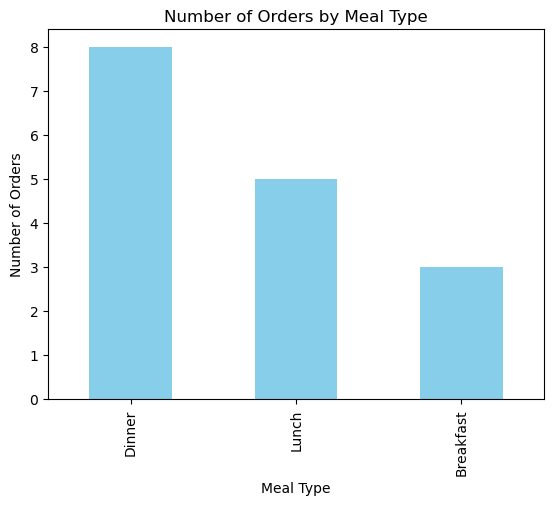

In [104]:
#Plot Orders by Meal Type

# Plot number of orders by meal type
final_data['Order Meal Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Number of Orders')
plt.show()

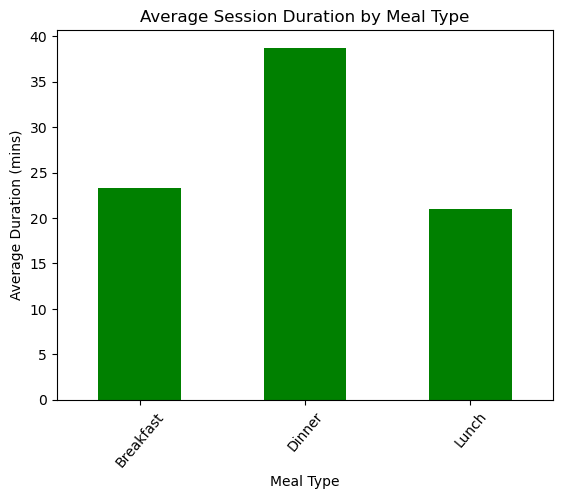

In [117]:
# Plot average session duration by meal type
avg_session_duration = final_data.groupby('Order Meal Type')['Duration (mins)'].mean()

# Plot the result
avg_session_duration.plot(kind='bar', color='green')
plt.title('Average Session Duration by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Duration (mins)')
plt.xticks(rotation=50)  # Rotate x-axis labels for better visibility
plt.show()


In [107]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           16 non-null     int64         
 1   User ID            16 non-null     object        
 2   Order Date         16 non-null     datetime64[ns]
 3   Order Meal Type    16 non-null     object        
 4   Order Dish Name    16 non-null     object        
 5   Order Status       16 non-null     object        
 6   Amount (USD)       16 non-null     float64       
 7   Time of Day        16 non-null     object        
 8   Rating             14 non-null     float64       
 9   Session ID         16 non-null     object        
 10  User Name          16 non-null     object        
 11  Age                16 non-null     int64         
 12  Location           16 non-null     object        
 13  Registration Date  16 non-null     datetime64[ns]
 14  Phone       

In [118]:
# Export the final processed dataset to a CSV file
final_data.to_csv('final_merged_data.csv', index=False)

print("Final merged dataset saved successfully!")

Final merged dataset saved successfully!
